## 1. Linear Regression and Multiple Linear Regression 

#### Import Libraries

In [105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [106]:
#load Data and stored in dataframe df
path = "https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### a. Simple Linear Regression Model

#### Lets load the modules for linear regression

In [107]:
from sklearn.linear_model import LinearRegression

#### Create the Linear Regression Object

In [108]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### How could Highway-mpg help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [109]:
X = df[["highway-mpg"]]
Y = df["price"]

Fit the linear model using highway-mpg.

In [110]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

we can optput a prediction

In [111]:
Yhat = lm.predict(X)
Yhat[0:5]

array([ 16236.50464347,  16236.50464347,  17058.23802179,  13771.3045085 ,
        20345.17153508])

#### What is the value of the intercept (a) ?

In [112]:
lm.intercept_

38423.305858157415

#### What is the value of the Slope (b) ?

In [113]:
lm.coef_

array([-821.73337832])

### b. Multiple Linear Regression Model

Let's develop a model using these variables as the predictor variables.

In [114]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [115]:
 lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

 What is the value of the intercept(a)?

In [116]:
lm.intercept_

-15806.624626329234

What are the values of the coefficients (b1, b2, b3, b4) ?

In [117]:
lm.coef_

array([ 53.49574423,   4.70770099,  81.53026382,  36.05748882])

## 2)  Model Evaluation using Visualization

import the visualization package: seaborn

In [118]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

Let's visualize Horsepower as potential predictor variable of price:

(0, 48263.654377646591)

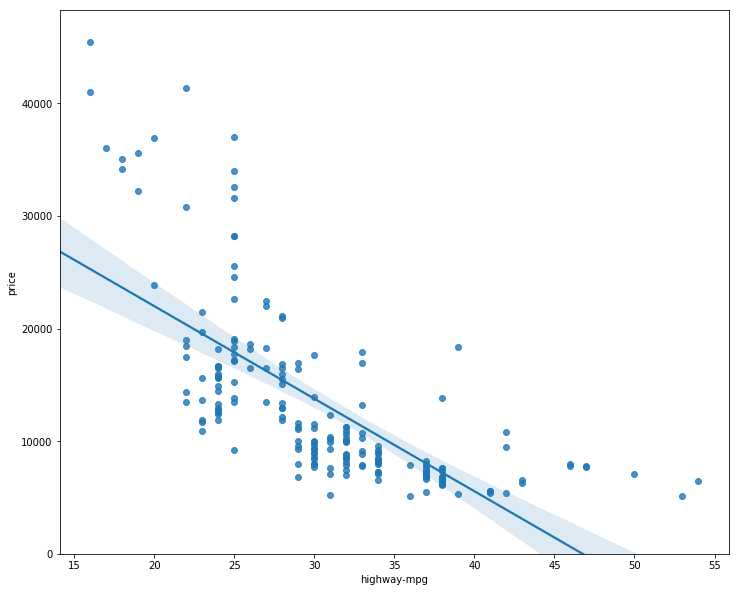

In [119]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

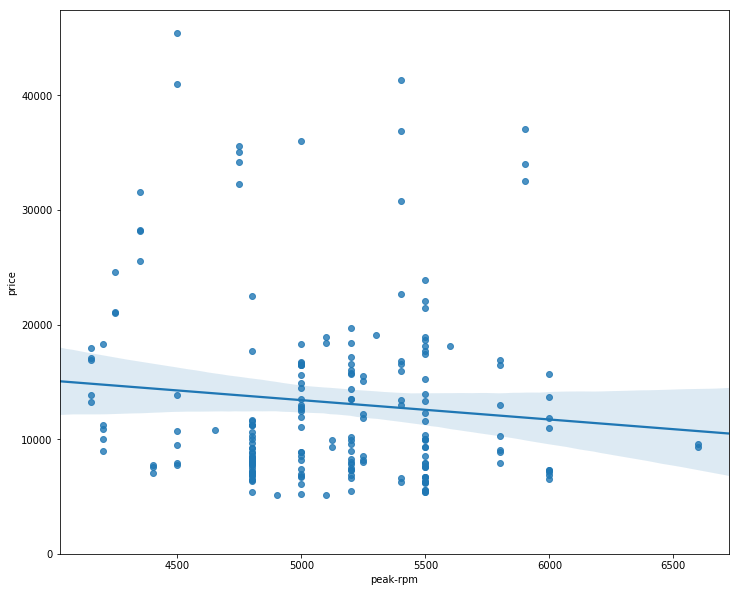

In [120]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [121]:
# The variable "peak-rpm"  has a stronger correlation with "price", 
# it is approximate -0.704692 compared to "highway-mpg" which is approximate -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

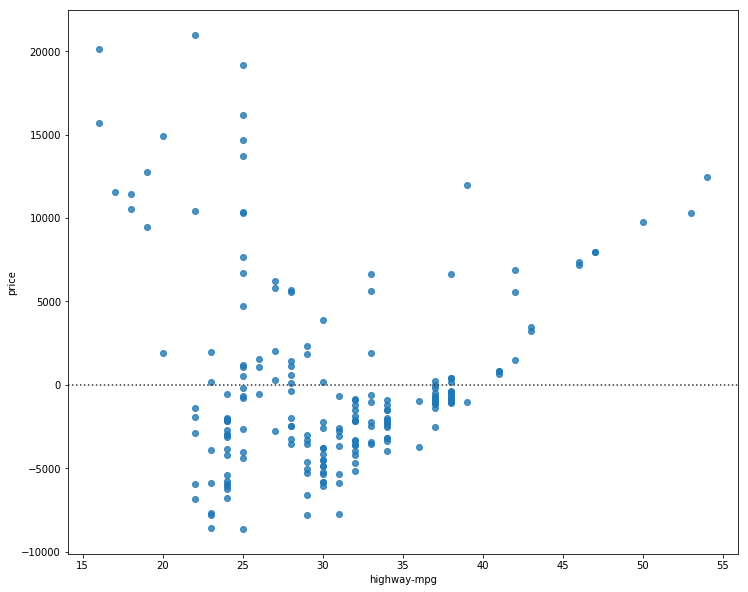

In [122]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

## Multiple Linear Regression

How do we visualise a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualise it with regression or residual plot.

One way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction

In [123]:
Y_hat = lm.predict(Z)

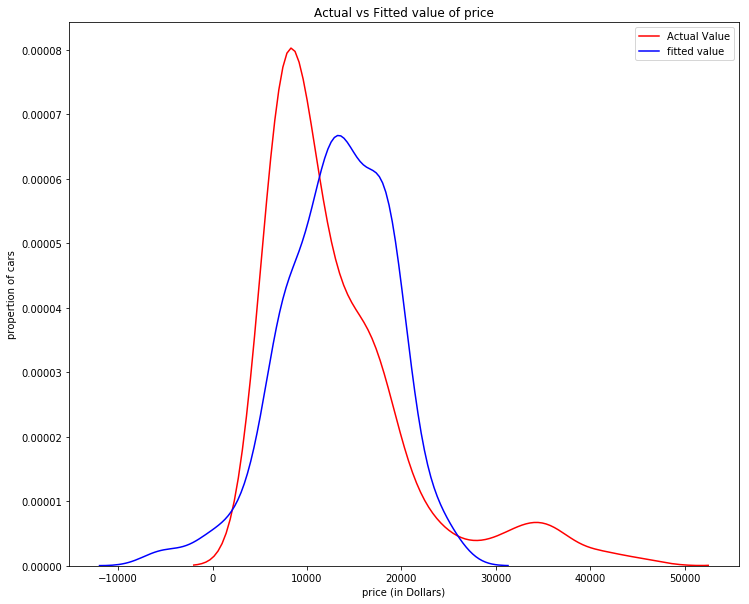

In [124]:
plt.figure(figsize=(width,height))


ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False,color="b", label="fitted value", ax=ax1)


plt.title("Actual vs Fitted value of price")
plt.xlabel("price (in Dollars)")
plt.ylabel("propertion of cars")

plt.show()
plt.close()

## Part 3: Polynomial Regression and Pipelines 

In [125]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")

done


In [126]:
# lets get the variables  
x = df['highway-mpg']
y = df['price']
print("done")

done


Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [127]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

C:\Users\Alok\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


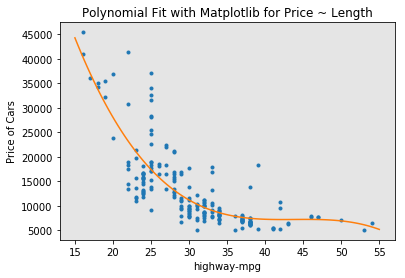

In [128]:
PlotPolly(p,x,y, 'highway-mpg')

In [129]:
np.polyfit(x, y, 3)

array([ -1.55663829e+00,   2.04754306e+02,  -8.96543312e+03,
         1.37923594e+05])

Create 11 order polynomial model with the variables x and y from above?

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


C:\Users\Alok\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


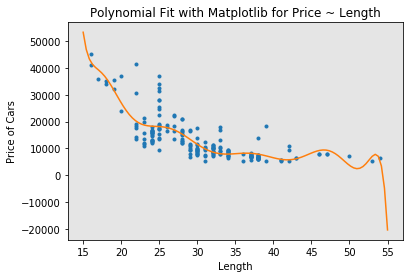

In [130]:
# calculate polynomial
# Here we use a polynomial of the 3rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

We can perform a polynomial transform on multiple features. First, we import the module:

In [131]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [132]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [133]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features

In [134]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features

In [135]:
Z_pr.shape

(201, 15)

## Pipeline 

Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [137]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

we input the list as an argument to the pipeline constructor

In [138]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

We can normalize the data, perform a transform and fit the model simultaneously.

In [139]:
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [140]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([ 13102.74784201,  13102.74784201,  18225.54572197,  10390.29636555])

In [141]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([ 13699.11161184,  13699.11161184,  19051.65470233,  10620.36193015,
        15521.31420211,  13869.66673213,  15456.16196732,  15974.00907672,
        17612.35917161,  10722.32509097])

## Part 4: Measures for In-Sample Evaluation

#### Model 1: Simple Linear Regression

Lets Calculate R^2

In [142]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.49659118843391759

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Lets Calculate MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [143]:
Yhat = lm.predict(X)
Yhat[0:4]

array([ 16236.50464347,  16236.50464347,  17058.23802179,  13771.3045085 ])

lets import the function mean_squared_error from the module metrics

In [144]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results

In [145]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat)

31635042.944639888

#### Model 2: Multiple Linear Regression

Let's calculate the R^2

In [146]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.80935628065774567

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction

In [147]:
Y_predict_multifit = lm.predict(Z)

we compare the predicted results with the actual results

In [148]:
mean_squared_error(df['price'], Y_predict_multifit)

11980366.87072649

### Model 3: Polynomial Fit

Let's calculate the R^2

let’s import the function r2_score from the module metrics as we are using a different function

In [149]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [150]:
r_squared = r2_score(y, p(x))
r_squared

0.67419466639065195

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

## MSE

We can also calculate the MSE:

In [151]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Part 5: Prediction and Decision Making
### Prediction

In the previous section, we trained the model using the method **fit**. Now we will use the method **predict** to produce a prediction.Lets import **pyplot** for plotting; we will also be using some functions from numpy. 

In [152]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a nwe input

In [158]:
new_input=np.arange(1,100,1).reshape(-1,1)

Fit the Model

In [159]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Produce a Prediction

In [160]:
yhat=lm.predict(new_input)
yhat[0:5]

array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655])

we can plot the data

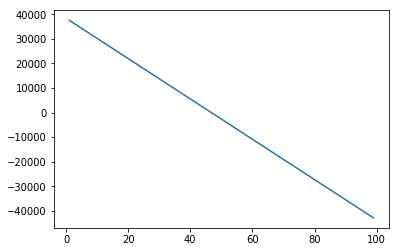

In [156]:
plt.plot(new_input,yhat)
plt.show()